In [1]:
import seaborn as sns
import metapack as mp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display 

%matplotlib inline
sns.set_context('notebook')
mp.jupyter.init()


In [2]:
pkg = mp.jupyter.open_package()
#pkg = mp.jupyter.open_source_package()
pkg

# Open Street Map Extract for Demographic Search
`civicknowledge.com-osm-demosearch-2.1.1` Last Update: 2021-04-23T01:02:45

__




 

## Contacts

* **Wrangler** [Eric Busboom](mailto:eric@civicknowledge.com), [Civic Knowledge](http://civicknowledge.com)

## Resources

* ** [point_tags](data/point_tags.csv)**. Points converted to counts of tags per geohash
* ** [residential_roads](data/residential_roads.csv)**. Residential roads per 4 digit geohash
* ** [nonres_roads](data/nonres_roads.csv)**. Non residential roads per 4 digit geohash
* ** [block_geo](data/block_geo.csv)**. Geographic shapes for blocs in block_osm
* ** [block_osm](data/block_osm.csv)**. Points from geohash_tags allocated to 2020 census blocks
* ** [utm_map](data/utm_map.csv)**. Map from census blocks to UTM zones
* ** [cbsa_map](data/cbsa_map.csv)**. Map from census blocks to CBSA Metros
* ** [business_clusters](data/business_clusters.csv)**. High density business clusters in CBSAs
* ** [metro_points](data/metro_points.csv)**. Points grouped into major categories and linked to business clusters.
* ** [bus_densities](data/bus_densities.csv)**. High-density business goehashes

## References
<ul><li> <strong>us_geohashes</string>, <em>metapack+http://library.metatab.org/civicknowledge.com-geohash-us.csv#us_geohashes</em>. All 4 digit geohases in the continential US</li><li> <strong><a href="https://download.geofabrik.de/north-america-latest.osm.pbf">north-america-latest</a></strong>. OSM North America extract</li><li> <strong>utm_grid</string>, <em>metapack+http://library.metatab.org/civicknowledge.com-mgrs.csv#utm_grid</em>. </li><li> <strong>points</string>, <em>data/csv/points.csv</em>. Points from the OSM file</li><li> <strong>lines</string>, <em>data/csv/lines.csv</em>. Lines from the OSM file</li><li> <strong>multipolygons</string>, <em>data/csv/multipolygons.csv</em>. Polygons from the OSM file</li><li> <strong>multilinestrings</string>, <em>data/csv/multilinestrings.csv</em>. Lines from the OSM file</li><li> <strong>other_relations</string>, <em>data/csv/other_relations.csv</em>. Other geo data from the OSM file</li><li> <strong>block_templ</string>, <em>censusgeo://2020/5/{st}/block</em>. Block url template</li><li> <strong>cbsa</string>, <em>censusgeo://2020/5/US/cbsa</em>. Metro areas</li><ul>

In [3]:
nr = pd.read_csv(pkg.resource('nonres_roads').resolved_url.fspath)
#res = pd.read_csv(pkg.resource('residential_roads').resolved_url.fspath)



In [11]:
import geopandas as gpd
from shapely.wkt import loads
t = nr.sample(5000).geometry.apply(loads)
t.apply(lambda v: v.geom_type).value_counts()

LineString         4998
MultiLineString       2
Name: geometry, dtype: int64

In [64]:
roads = nr.replace(type_map)
roads

,zone,epsg,us_state,cus_state,highway,geometry
0,16T,32616,1,1,3,"LINESTRING (-89.58575759999999 44.5411258, -89..."
1,16T,32616,1,1,1,"LINESTRING (-89.5494702 44.4817599, -89.549437..."
2,16T,32616,1,1,3,"LINESTRING (-89.5747358 44.5193199, -89.574630..."
3,16T,32616,1,1,5,"LINESTRING (-89.51856119999999 44.4271112, -89..."
4,16T,32616,1,1,3,"LINESTRING (-89.56464219999999 44.5294129, -89..."
...,...,...,...,...,...,...
2999287,18V,32618,0,0,3,"LINESTRING (-76.5484989 56.5500662, -76.548078..."
2999288,18V,32618,0,0,3,"LINESTRING (-76.5486061 56.5501086, -76.548498..."
2999289,10S,32610,1,1,3,"LINESTRING (-121.8375294 37.3436196, -121.8374..."
2999290,13R,32613,1,1,3,"LINESTRING (-105.4788119 28.1948945, -105.4788..."


,zone,epsg,us_state,cus_state,highway,geometry
0,16T,32616,1,1,3,"LINESTRING (-89.58575759999999 44.5411258, -89..."
1,16T,32616,1,1,1,"LINESTRING (-89.5494702 44.4817599, -89.549437..."
2,16T,32616,1,1,3,"LINESTRING (-89.5747358 44.5193199, -89.574630..."
3,16T,32616,1,1,m,"LINESTRING (-89.51856119999999 44.4271112, -89..."
4,16T,32616,1,1,3,"LINESTRING (-89.56464219999999 44.5294129, -89..."
...,...,...,...,...,...,...
2999287,18V,32618,0,0,3,"LINESTRING (-76.5484989 56.5500662, -76.548078..."
2999288,18V,32618,0,0,3,"LINESTRING (-76.5486061 56.5501086, -76.548498..."
2999289,10S,32610,1,1,3,"LINESTRING (-121.8375294 37.3436196, -121.8374..."
2999290,13R,32613,1,1,3,"LINESTRING (-105.4788119 28.1948945, -105.4788..."


<AxesSubplot:>

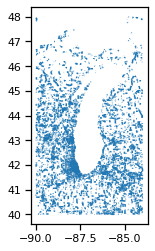

In [62]:
t.sample(20000).plot()

In [65]:
t.highway.value_counts()

2    45791
3    45641
1    41087
m    12369
t     5770
Name: highway, dtype: int64